Jacobi and Gauss-Seidel Methods

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations
    
    
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations

In [62]:
A = np.array([[3., -0.1, -0.2],
              [0.1, 7., -0.3],
              [0.3, -0.2, 10.]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros(3)
max_iterations = 100
tol = np.array([1e-3, 1e-6, 1e-9])
sol = np.zeros((6, 3))
it = np.zeros(6)

true = np.linalg.solve(A, b)

In [66]:
# Jacobi
sol[0], it[0] = jacobi(A, b, x0, tol[0], max_iterations)
sol[1], it[1] = jacobi(A, b, x0, tol[1], max_iterations)
sol[2], it[2] = jacobi(A, b, x0, tol[2], max_iterations)
print("Jacobi Method:\n")
for i in range (3):
    print("Solution: with tolerance =", tol[i], "\n", sol[i,:], "\n", "Iterations:", it[i], "\n")

# Gauss-Seidel
sol[3], it[3] = gauss_seidel(A, b, x0, tol[0], max_iterations)
sol[4], it[4] = gauss_seidel(A, b, x0, tol[1], max_iterations)
sol[5], it[5] = gauss_seidel(A, b, x0, tol[2], max_iterations)
print("Gauss-Seidel Method:\n")
for j in range (3, 6):
    print("Solution: with tolerance =", tol[i], "\n", sol[j,:], "\n", "Iterations:", it[j], "\n")

Jacobi Method:

Solution: with tolerance = 0.001 
 [ 3.0000225  -2.50000266  6.99998104] 
 Iterations: 3.0 

Solution: with tolerance = 1e-06 
 [ 3.  -2.5  7. ] 
 Iterations: 6.0 

Solution: with tolerance = 1e-09 
 [ 3.  -2.5  7. ] 
 Iterations: 8.0 

Gauss-Seidel Method:

Solution: with tolerance = 1e-09 
 [ 3.00000035 -2.50000004  6.99999999] 
 Iterations: 3.0 

Solution: with tolerance = 1e-09 
 [ 3.  -2.5  7. ] 
 Iterations: 4.0 

Solution: with tolerance = 1e-09 
 [ 3.  -2.5  7. ] 
 Iterations: 6.0 



The Gauss-Seidel Method and Jacobi Method required the same number of iterations to converge when the tolerance was 1e-3, and Gauss-Seidel required less iterations for smaller tolerances.

In [133]:
solJacobi = sol[0:3] # creating an array of solutions from Jacobi method
solGauss = sol[3:] # creating an array of solutions from Gauss-Seidel method

vector1 = np.ones(3)

diffJacobi = solJacobi[1:] - solJacobi[:-1]
errorJacobi = np.dot(diffJacobi, vector1)
    
    # currently only calculating error for one solution, need to find length of that for actual error

diffGauss = solGauss[1:] - solGauss[:-1]
    
print(errorJacobi)



[-8.70132813e-07 -5.15400123e-09]


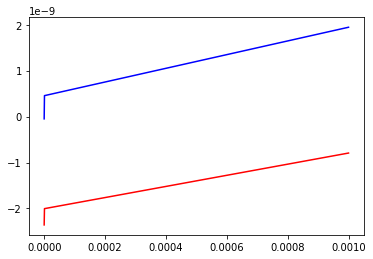

In [114]:
# Jacobi convergence
plt.plot(tol, errorJacobi.T, 'r') # transposing to change orientation
plt.plot(tol, errorGauss.T, 'b')
plt.show()